In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [54]:
 # 图片路径
str='1400'
img = cv2.imread('extract/nid/{}.jpg'.format(str))

In [34]:
XY=np.zeros(img.shape)
x=np.load('result/nid/x_{}.npy'.format(str))
y=np.load('result/nid/y_{}.npy'.format(str))
for i in range(len(x)):
    XY[y[i],x[i],:]=1

In [37]:
img_piece1=img[200:400,800:1000]
img_piece2=img[600:800,600:800]
img_piece3=img[800:900,600:700]

In [3]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

In [64]:
[angle1, angle2,angle3] =np.random.choice([0, 90, 180, 270],3)
angle1, angle2,angle3

(0, 0, 180)

In [2]:
def img_generate(img,XY):

    [angle1, angle2,angle3] = np.random.choice([0, 90, 180, 270], 3)
    img_copy=img.copy()
    XY_copy=XY.copy()

    img_piece1=img_copy[800:900,200:300]
    img_piece2=img_copy[600:800,600:800]
    img_piece3=img_copy[800:900,600:700]
    XY_piece1=XY_copy[800:900,200:300]
    XY_piece2=XY_copy[600:800,600:800]
    XY_piece3=XY_copy[800:900,600:700]

    img_copy[800:900,200:300]=rotate_image(img_piece1, angle1)
    img_copy[600:800,600:800]=rotate_image(img_piece2, angle2)
    img_copy[800:900,600:700]=rotate_image(img_piece3, angle3)

    XY_copy[800:900,200:300]=rotate_image(XY_piece1, angle1)
    XY_copy[600:800,600:800]=rotate_image(XY_piece2, angle2)
    XY_copy[800:900,600:700]=rotate_image(XY_piece3, angle3)

    return img_copy, XY_copy

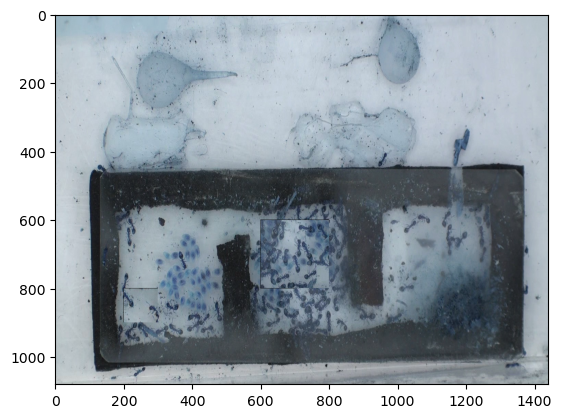

In [72]:
plt.imshow(img_generate(img))

In [8]:
import string

In [6]:
X_train=[]
Y_train=[]
str_list=[str(100*i) for i in range(1,15)]
for num_str in  str_list:
    img = cv2.imread('extract/nid/{}.jpg'.format(num_str))
    XY=np.zeros(img.shape)
    x=np.load('result/nid/x_{}.npy'.format(num_str))
    y=np.load('result/nid/y_{}.npy'.format(num_str))
    for i in range(len(x)):
        XY[y[i],x[i],:]=1
    for j in range(30):
        img_result,XY_result=img_generate(img,XY)
        X_train.append(img_result)
        Y_train.append(XY_result)


In [11]:
np.save("extract/nid/X_train.npy",X_train)
np.save('extract/nid/Y_train.npy',Y_train)

In [9]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_train.shape,Y_train.shape

((420, 1080, 1440, 3), (420, 1080, 1440, 3))